In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn import model_selection
from scipy.stats import ttest_rel, f
from sklearn.linear_model import Lasso, LassoCV
import math

def f_test(x,y):
    # 计算组内样本方差
    var1 = np.var(x, ddof=1)
    var2 = np.var(y, ddof=1)
    # 计算统计量F
    F = var1 / var2
    # 计算自由度
    df1 = len(x) - 1
    df2 = len(y) - 1
    # 计算p值
    p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))

    return p_value


df1=pd.read_excel('beijing.xlsx')
df1.index=df1['Time']
#df1=df1.drop(2004,axis=0)
df1

,Time,Taxi,Population,Economic,Car,Income,Expenditure,Traveler
Time,,,,,,,,
1994,1994,56124,1061.8,1149.8,8.547400,4731.2,4134.1,6913.0
1995,1995,56686,1070.3,1516.2,12.756800,5868.4,5019.8,6527.0
1996,1996,59493,1077.7,1819.4,17.364200,6885.5,5729.5,7901.9
1997,1997,59902,1085.5,2118.1,29.758600,7813.1,6531.8,8450.8
1998,1998,61301,1091.5,2439.1,40.747600,8472.0,6970.8,8951.5
1999,1999,61920,1099.8,2759.8,0.004474,9182.8,7498.5,9512.4
2000,2000,65127,1107.5,3277.8,49.414300,10349.7,8493.5,10468.1
2001,2001,65155,1122.3,3861.5,62.408100,11577.8,8922.7,11292.8
2002,2002,66759,1136.3,4525.7,81.078500,12463.9,10285.8,11810.4


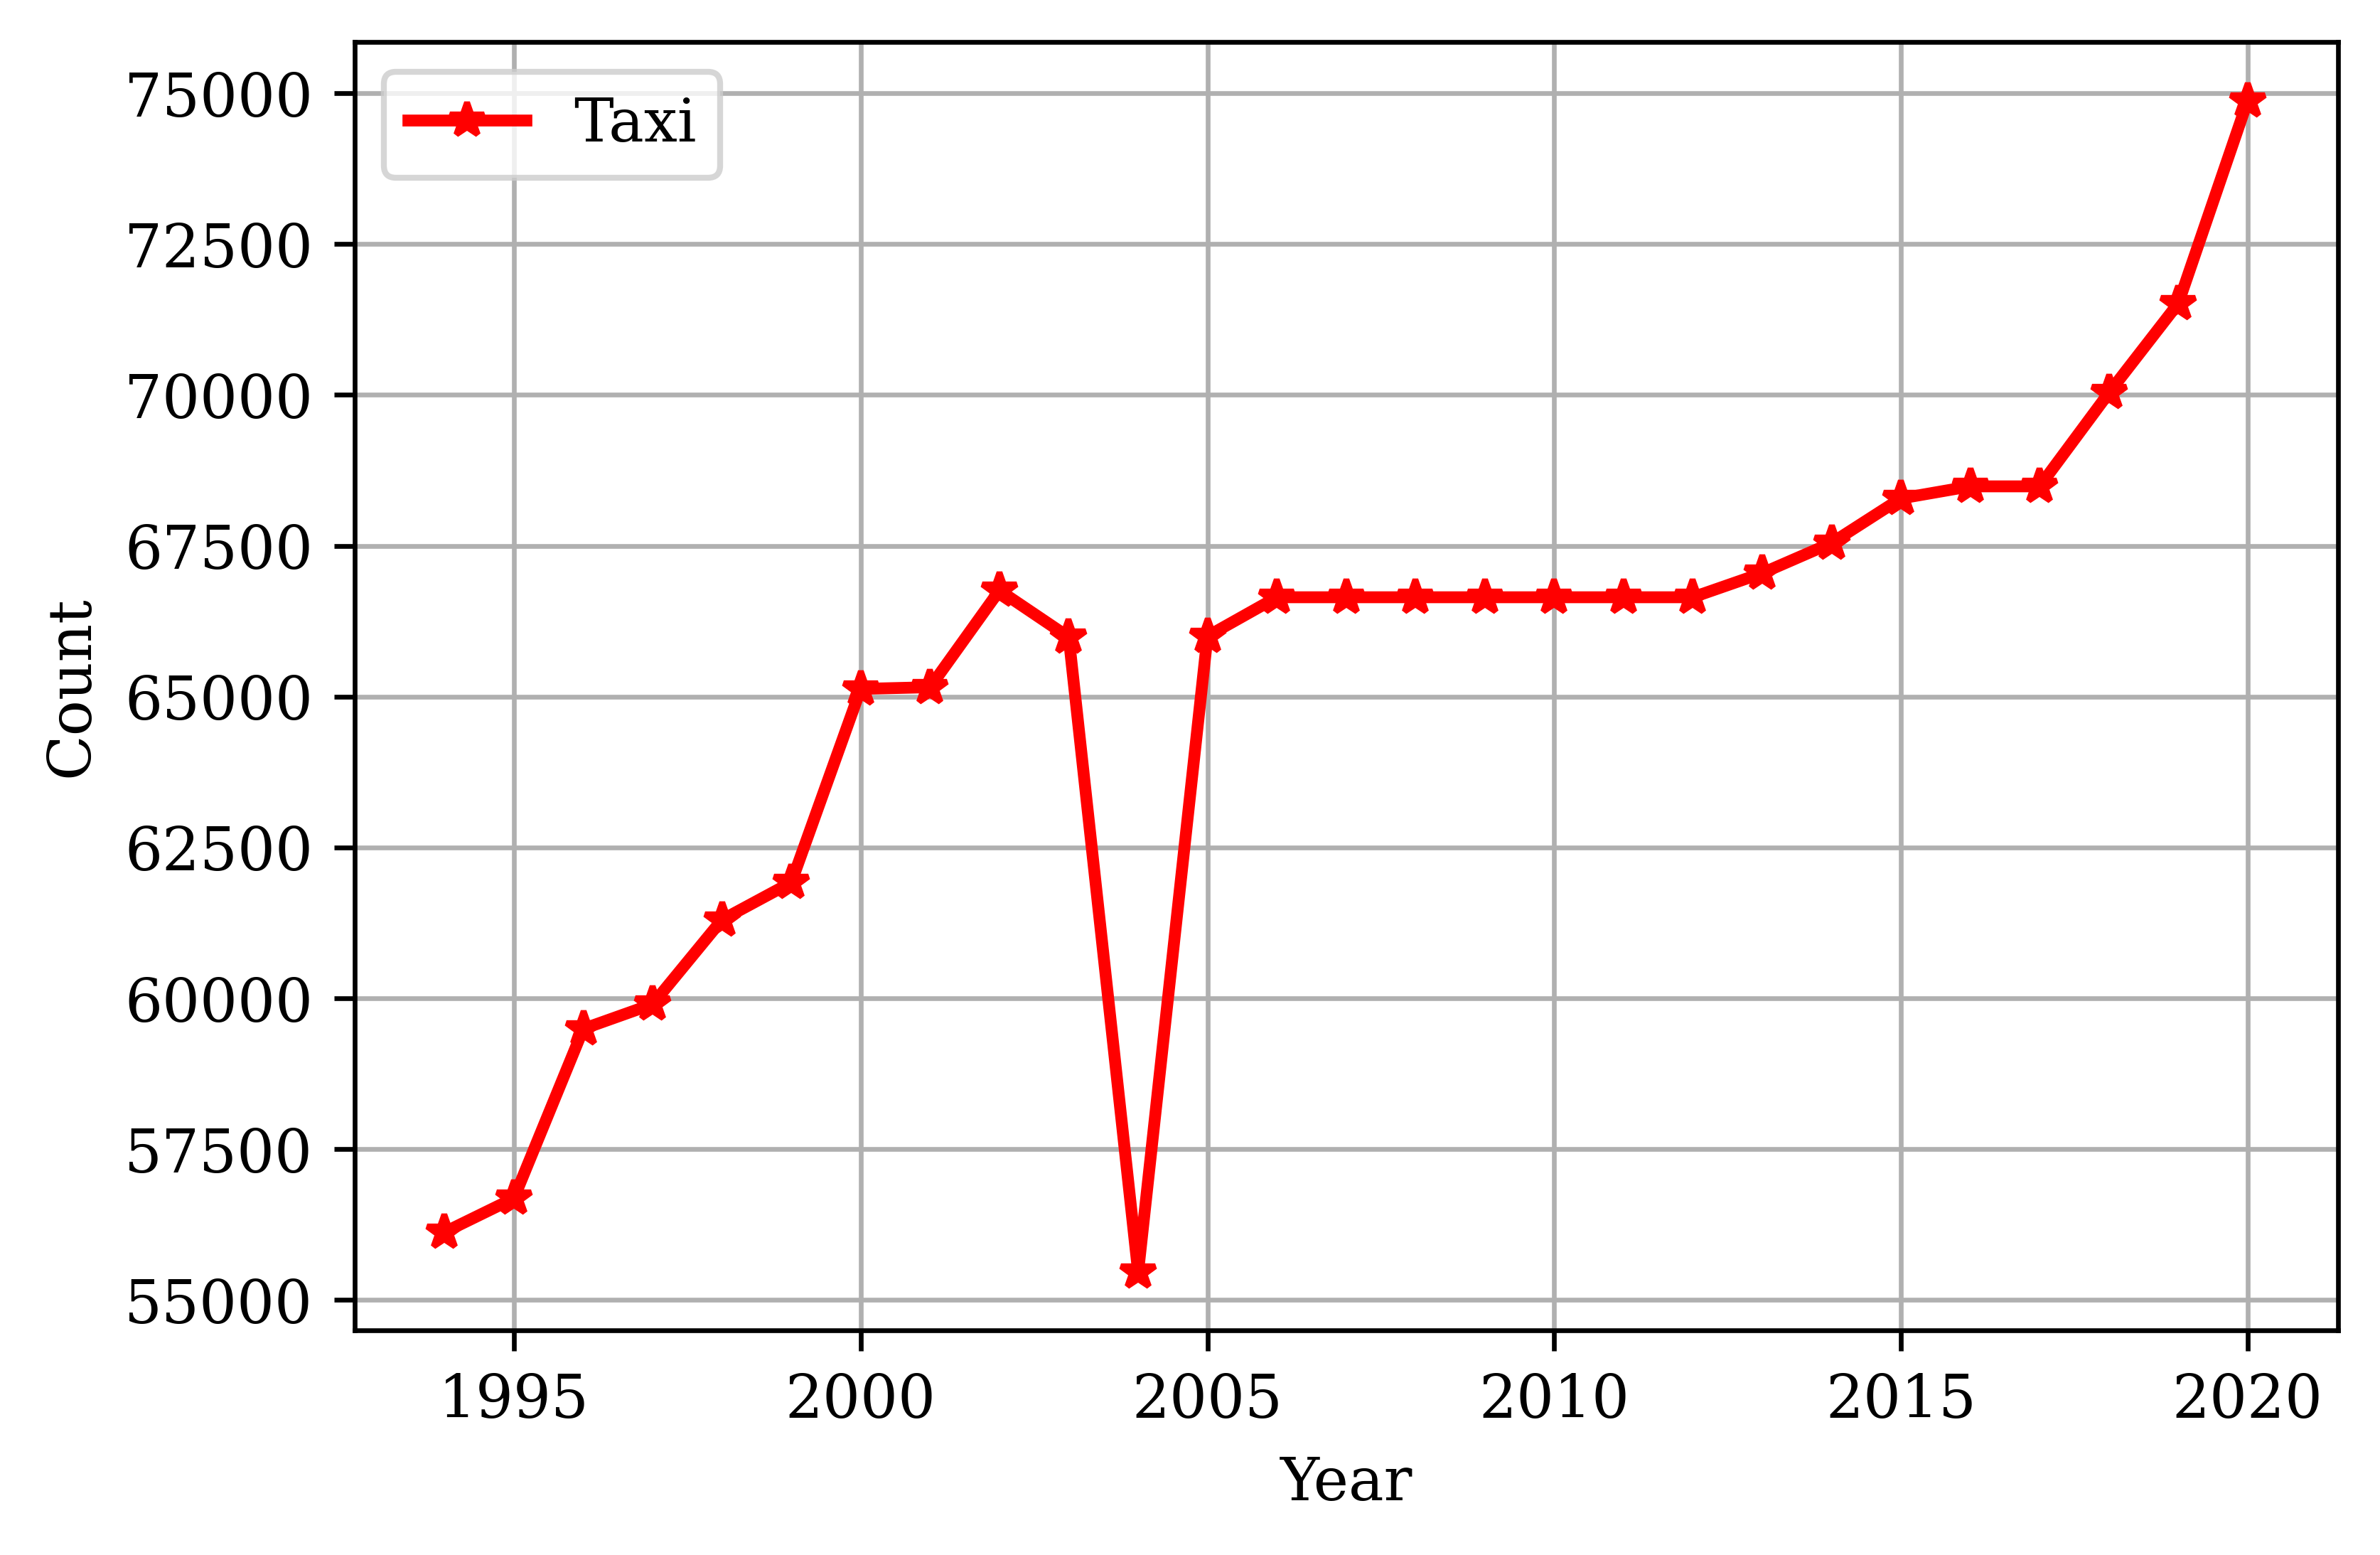

In [129]:
plt.rcParams['font.family'] = 'serif'
plt.figure(dpi=600)
plt.plot(df1['Time'],df1['Taxi'],'r',marker='*',lw=2,label='Taxi')
plt.grid()
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend()
plt.savefig('Taxi_Beijing.jpg')

In [130]:
df2=df1.drop(['Time','Taxi'],axis=1)
df2

,Population,Economic,Car,Income,Expenditure,Traveler
Time,,,,,,
1994,1061.8,1149.8,8.547400,4731.2,4134.1,6913.0
1995,1070.3,1516.2,12.756800,5868.4,5019.8,6527.0
1996,1077.7,1819.4,17.364200,6885.5,5729.5,7901.9
1997,1085.5,2118.1,29.758600,7813.1,6531.8,8450.8
1998,1091.5,2439.1,40.747600,8472.0,6970.8,8951.5
1999,1099.8,2759.8,0.004474,9182.8,7498.5,9512.4
2000,1107.5,3277.8,49.414300,10349.7,8493.5,10468.1
2001,1122.3,3861.5,62.408100,11577.8,8922.7,11292.8
2002,1136.3,4525.7,81.078500,12463.9,10285.8,11810.4


In [131]:
#KMO检验和Bartlett球状检验
# Bartlett's球状检验
# 检验总体变量的相关矩阵是否是单位阵（相关系数矩阵对角线的所有元素均为1,所有非对角线上的元素均为零）；即检验各个变量是否各自独立。
# 如果不是单位矩阵，说明原变量之间存在相关性，可以进行因子分子；反之，原变量之间不存在相关性，数据不适合进行主成分分析
chi_square_value, p_value = calculate_bartlett_sphericity(df2)
print("Bartlett's球状检验参数：\n",chi_square_value, p_value)
#KMO检验
# 检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。
# 通常取值从0.6开始进行因子分析
kmo_all,kmo_model=calculate_kmo(df2)
print("KMO检验参数：\n",kmo_model)

Bartlett's球状检验参数：
 524.0955091203957 4.490676344885023e-102
KMO检验参数：
 0.6459428843546294


In [132]:
# 构建因子分析模型
fa = FactorAnalyzer(6, rotation=None)
# 训练模型
fa.fit(df2)
# 得到特征值ev、特征向量v
ev, v = fa.get_eigenvalues()
print('因子分析的特征值：',ev,'\n特征向量：', v)
# 同样的数据绘制散点图和折线图

因子分析的特征值： [5.78682186e+00 1.24277812e-01 7.72007256e-02 8.39288991e-03
 3.18007744e-03 1.26639426e-04] 
特征向量： [ 5.78294926e+00  1.20350832e-01  7.25527116e-02  4.21264721e-03
 -7.66511100e-04 -2.60565209e-03]


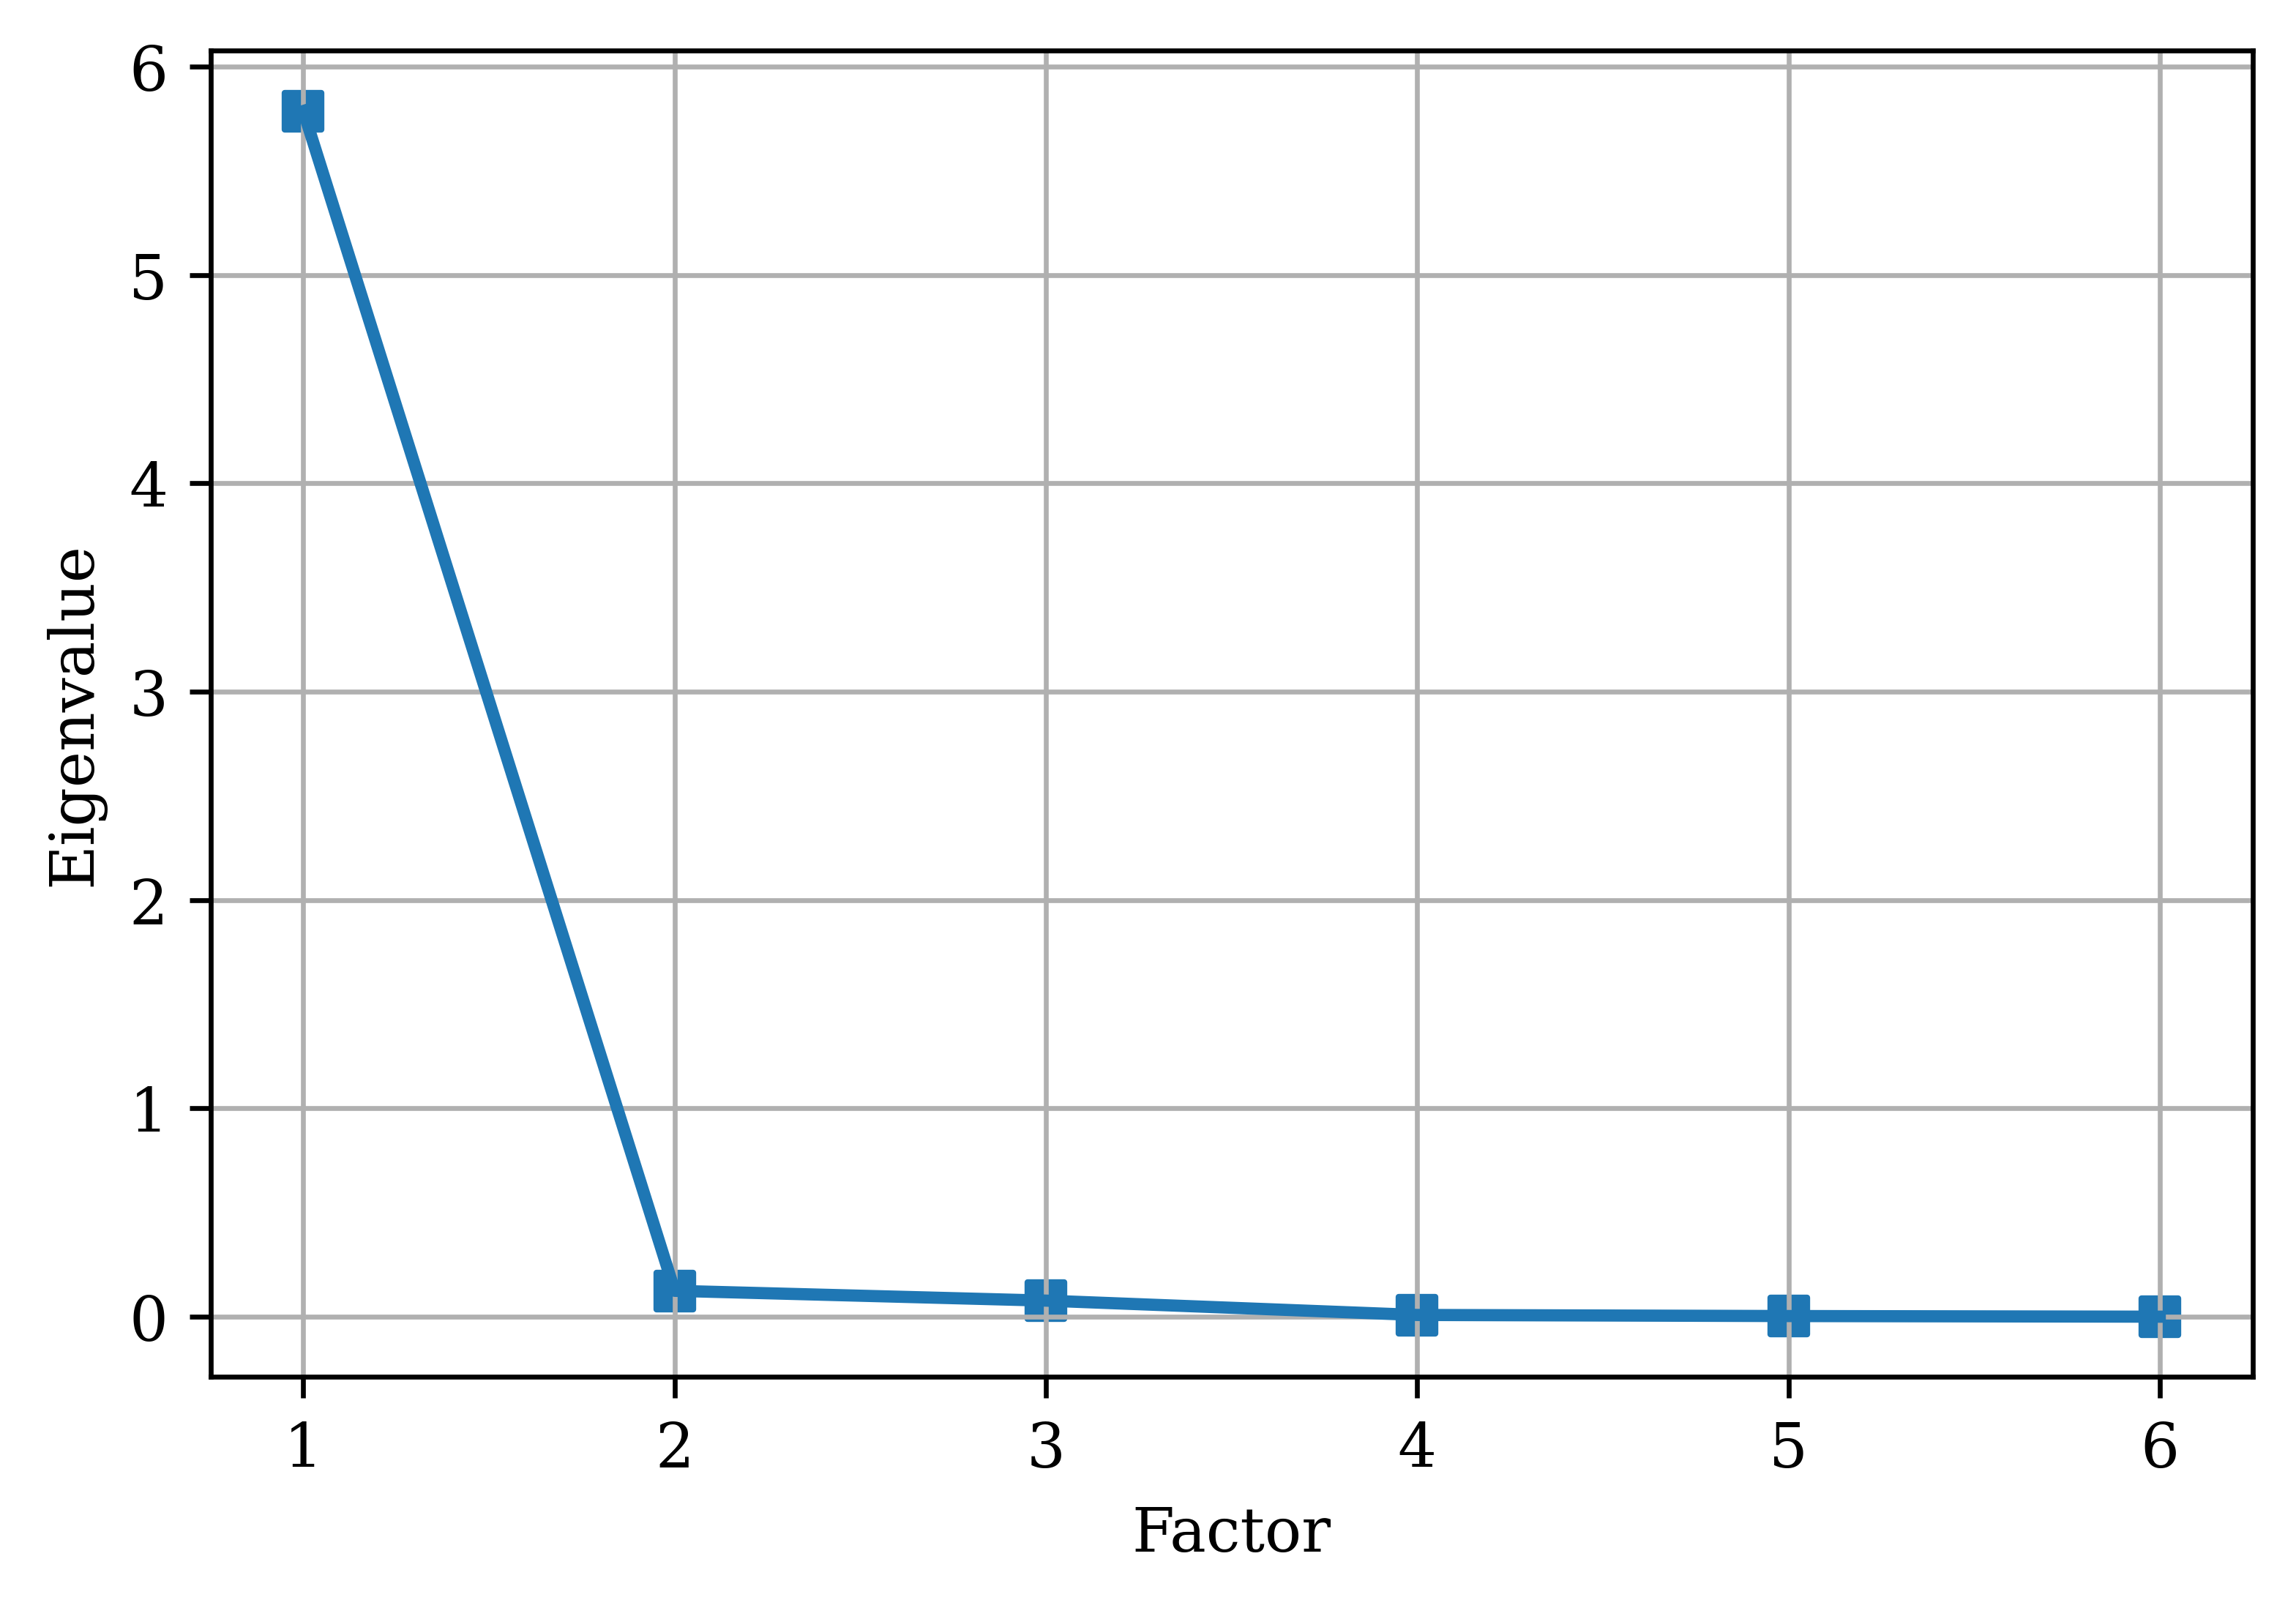

In [133]:
plt.figure(dpi=600)
plt.scatter(range(1, df2.shape[1] + 1), ev,marker='s')
plt.plot(range(1, df2.shape[1] + 1), ev,lw=2)
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('碎石图.jpg')

In [134]:
data=scale(df2)
pca=PCA(n_components=6)
pca.fit(df2)
print(pca.explained_variance_ratio_)
coefficient1=pca.components_[0]
coefficient2=pca.components_[1]
print('系数：',coefficient1,coefficient2)
print(pca.explained_variance_)

[9.86379402e-01 1.21586795e-02 1.33895262e-03 1.22098288e-04
 7.72035292e-07 9.50829405e-08]
系数： [0.00372985 0.38840305 0.00599751 0.76019303 0.45143063 0.25963462] [-0.00353824  0.03936023 -0.00869514  0.36518816 -0.11810564 -0.92252442]
[8.69216988e+08 1.07144682e+07 1.17991146e+06 1.07595420e+05
 6.80332730e+02 8.37889630e+01]


In [135]:
X1_list=[]
X2_list=[]
for each in data:
    X1=(coefficient1[0]*each[0]+coefficient1[1]*each[1]+coefficient1[2]*each[2]+coefficient1[3]*each[3]+coefficient1[4]*each[4]+coefficient1[5]*each[5])*math.sqrt(pca.explained_variance_[0])
    X2=(coefficient2[0]*each[0]+coefficient2[1]*each[1]+coefficient2[2]*each[2]+coefficient2[3]*each[3]+coefficient2[4]*each[4]+coefficient2[5]*each[5])*math.sqrt(pca.explained_variance_[1])
    X1_list.append(X1)
    X2_list.append(X2)
df1_2=pd.DataFrame({'X1':X1_list,'X2':X2_list})
df1_2

,X1,X2
0,-63309.119563,2779.022882
1,-61232.185579,2961.554013
2,-57852.437133,2483.711009
3,-55249.138317,2305.808283
4,-53314.851153,2142.735783
5,-51228.383301,1965.133867
6,-47541.562024,1639.204194
7,-44453.278259,1387.949472
8,-40967.869015,1205.493382
9,-40653.424358,2354.623695


In [136]:
model=LinearRegression()
model=model.fit(df1_2,df1['Taxi'])
print(model.coef_)
predict_value=model.predict(df1_2)

[0.08028397 0.42459564]


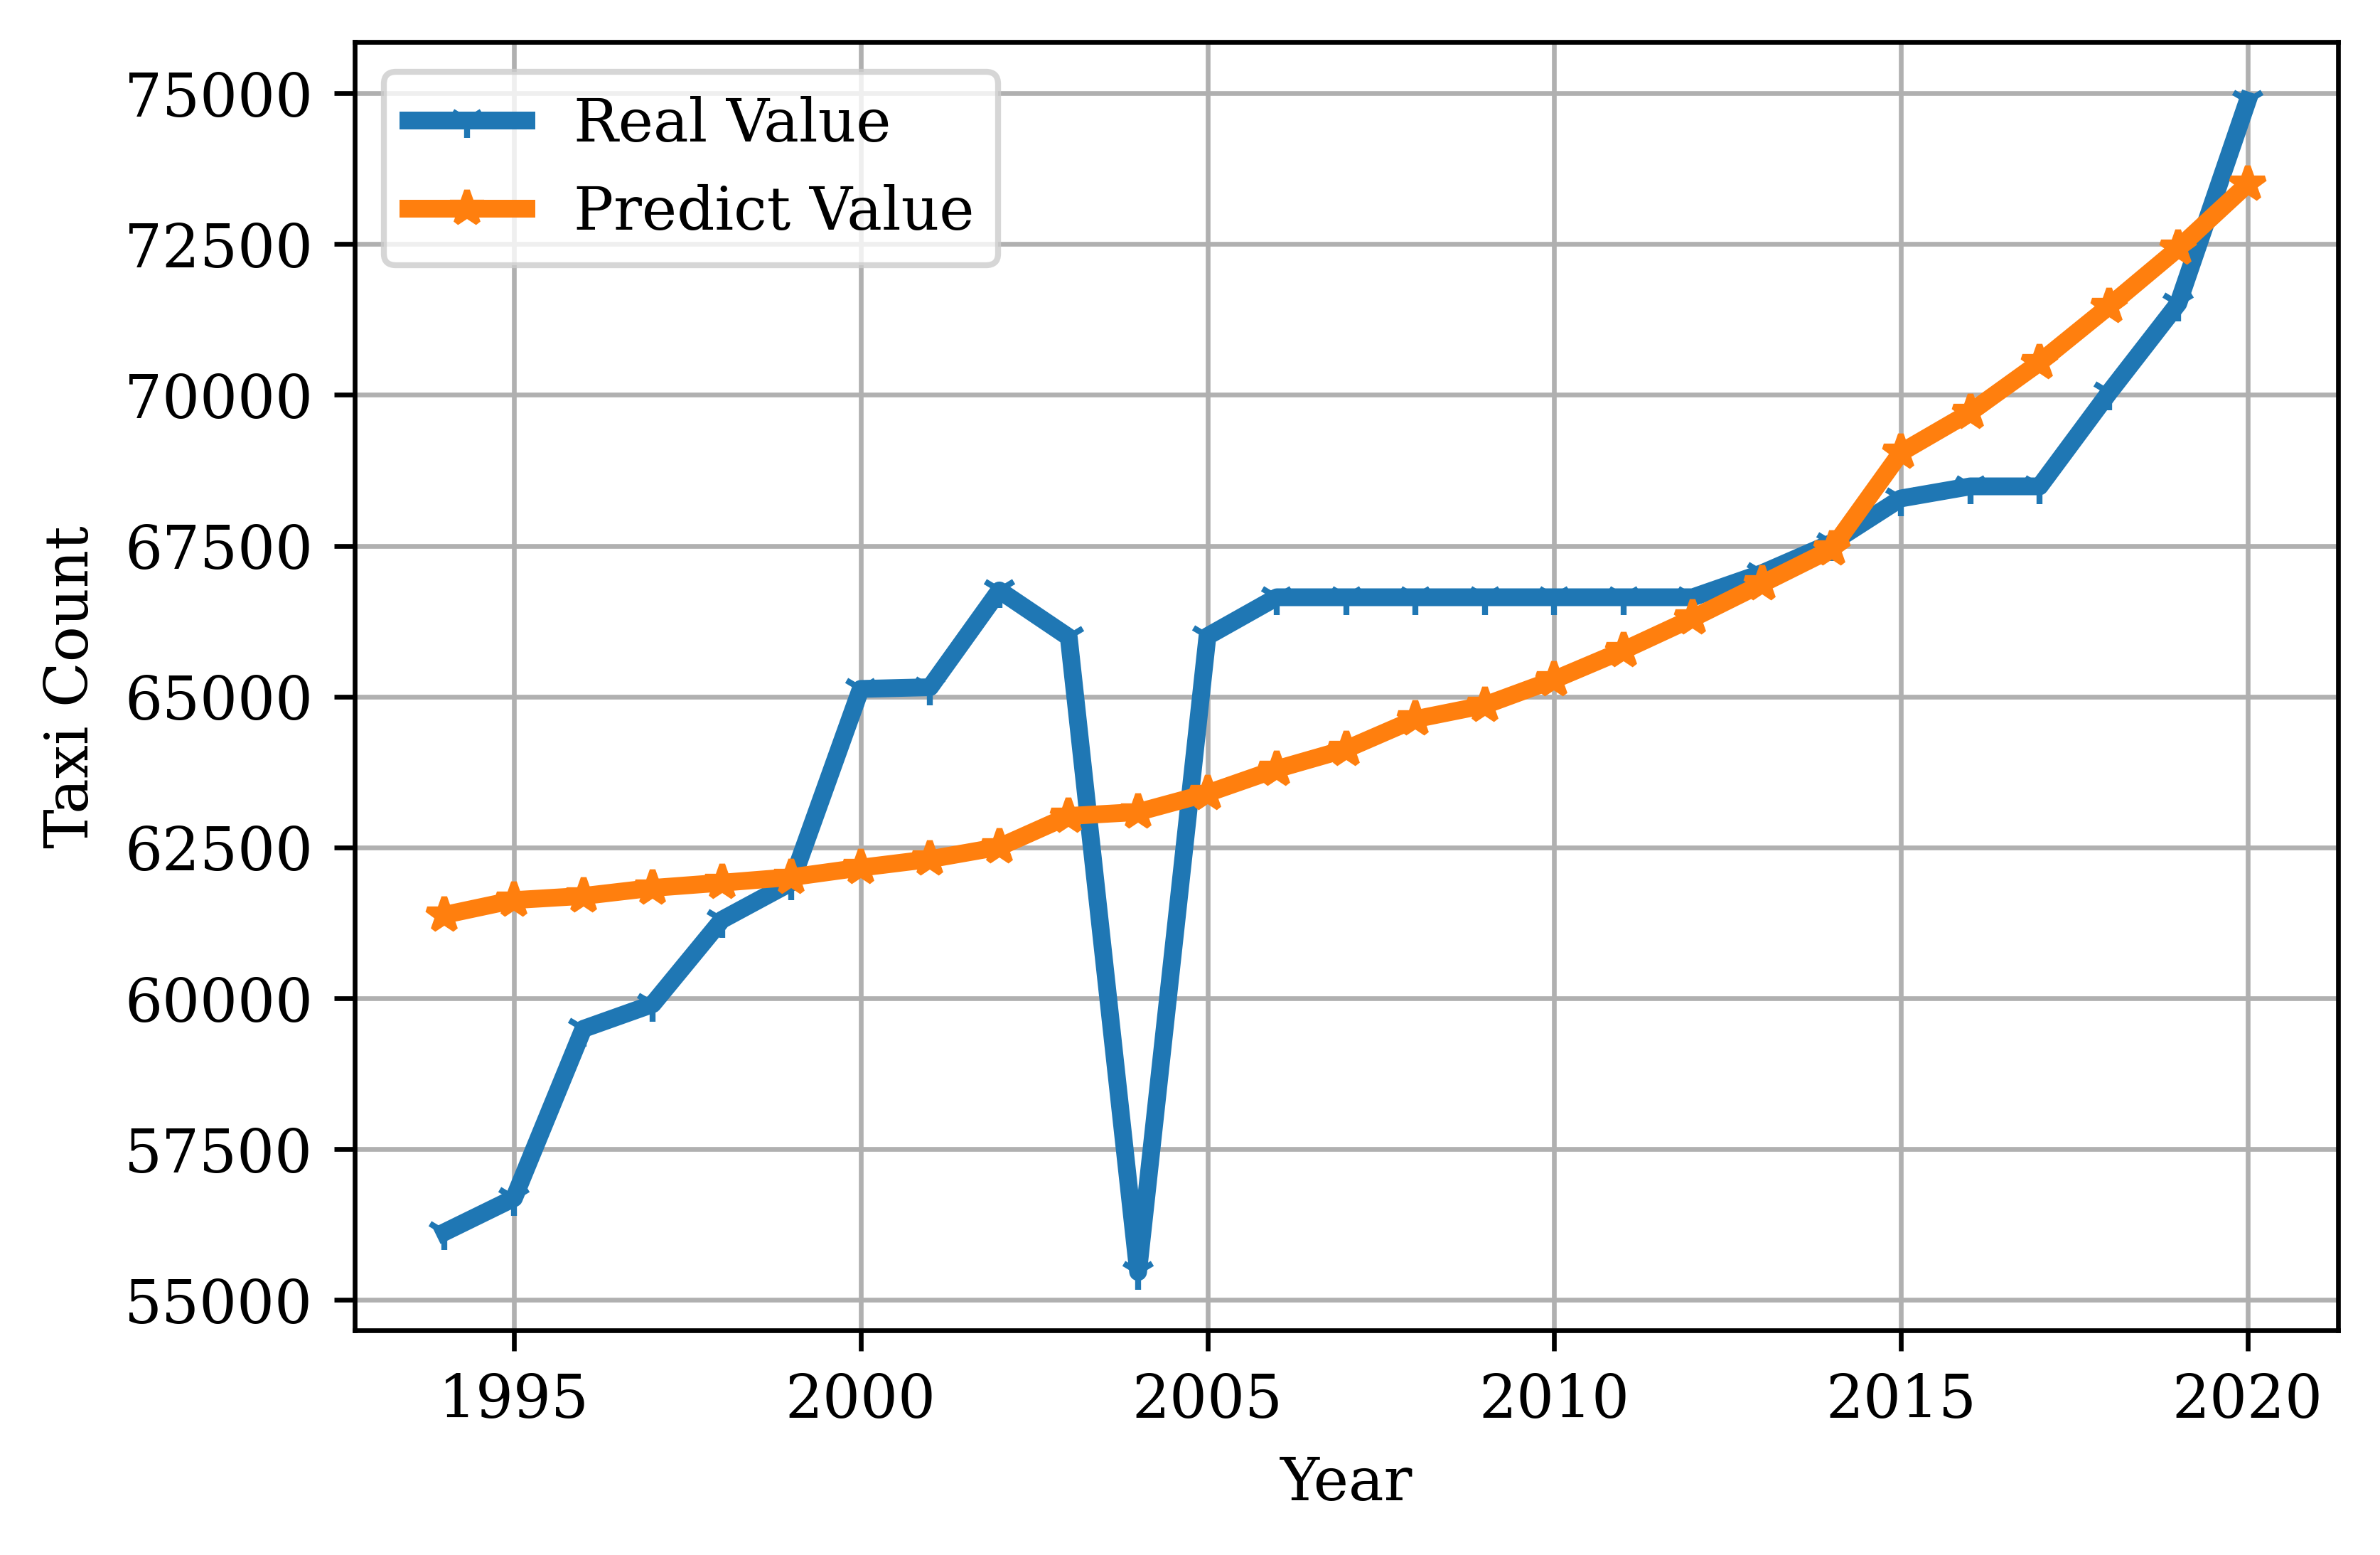

In [137]:
plt.figure(dpi=600)
plt.plot(df1['Time'],df1['Taxi'],lw=3,label='Real Value',marker='1',)
plt.plot(df1['Time'],predict_value,lw=3,label='Predict Value',marker='*')
plt.xlabel('Year')
plt.ylabel('Taxi Count')
plt.grid()
plt.legend()
plt.savefig('多元拟合.jpg')

[0.914329310242058, 0.9198249313327161, 0.9643021314024453, 0.9688355810965835, 0.9900845715772308, 0.9985967102443379, 1.0476538255324002, 1.0457280119547447, 1.0680033896425138, 1.0470096086893679, 0.8791629117183796, 1.0410348756301777, 1.044625204236456, 1.0392547200199251, 1.0312386926279153, 1.027570528340981, 1.0209115955287351, 1.0133535276134662, 1.005213086902635, 1.0026116568882406, 1.0015230100933998, 0.9889859356308351, 0.9823938923711915, 0.9708736530750208, 0.97992581679815, 0.98737478056628, 1.0187802904997614]


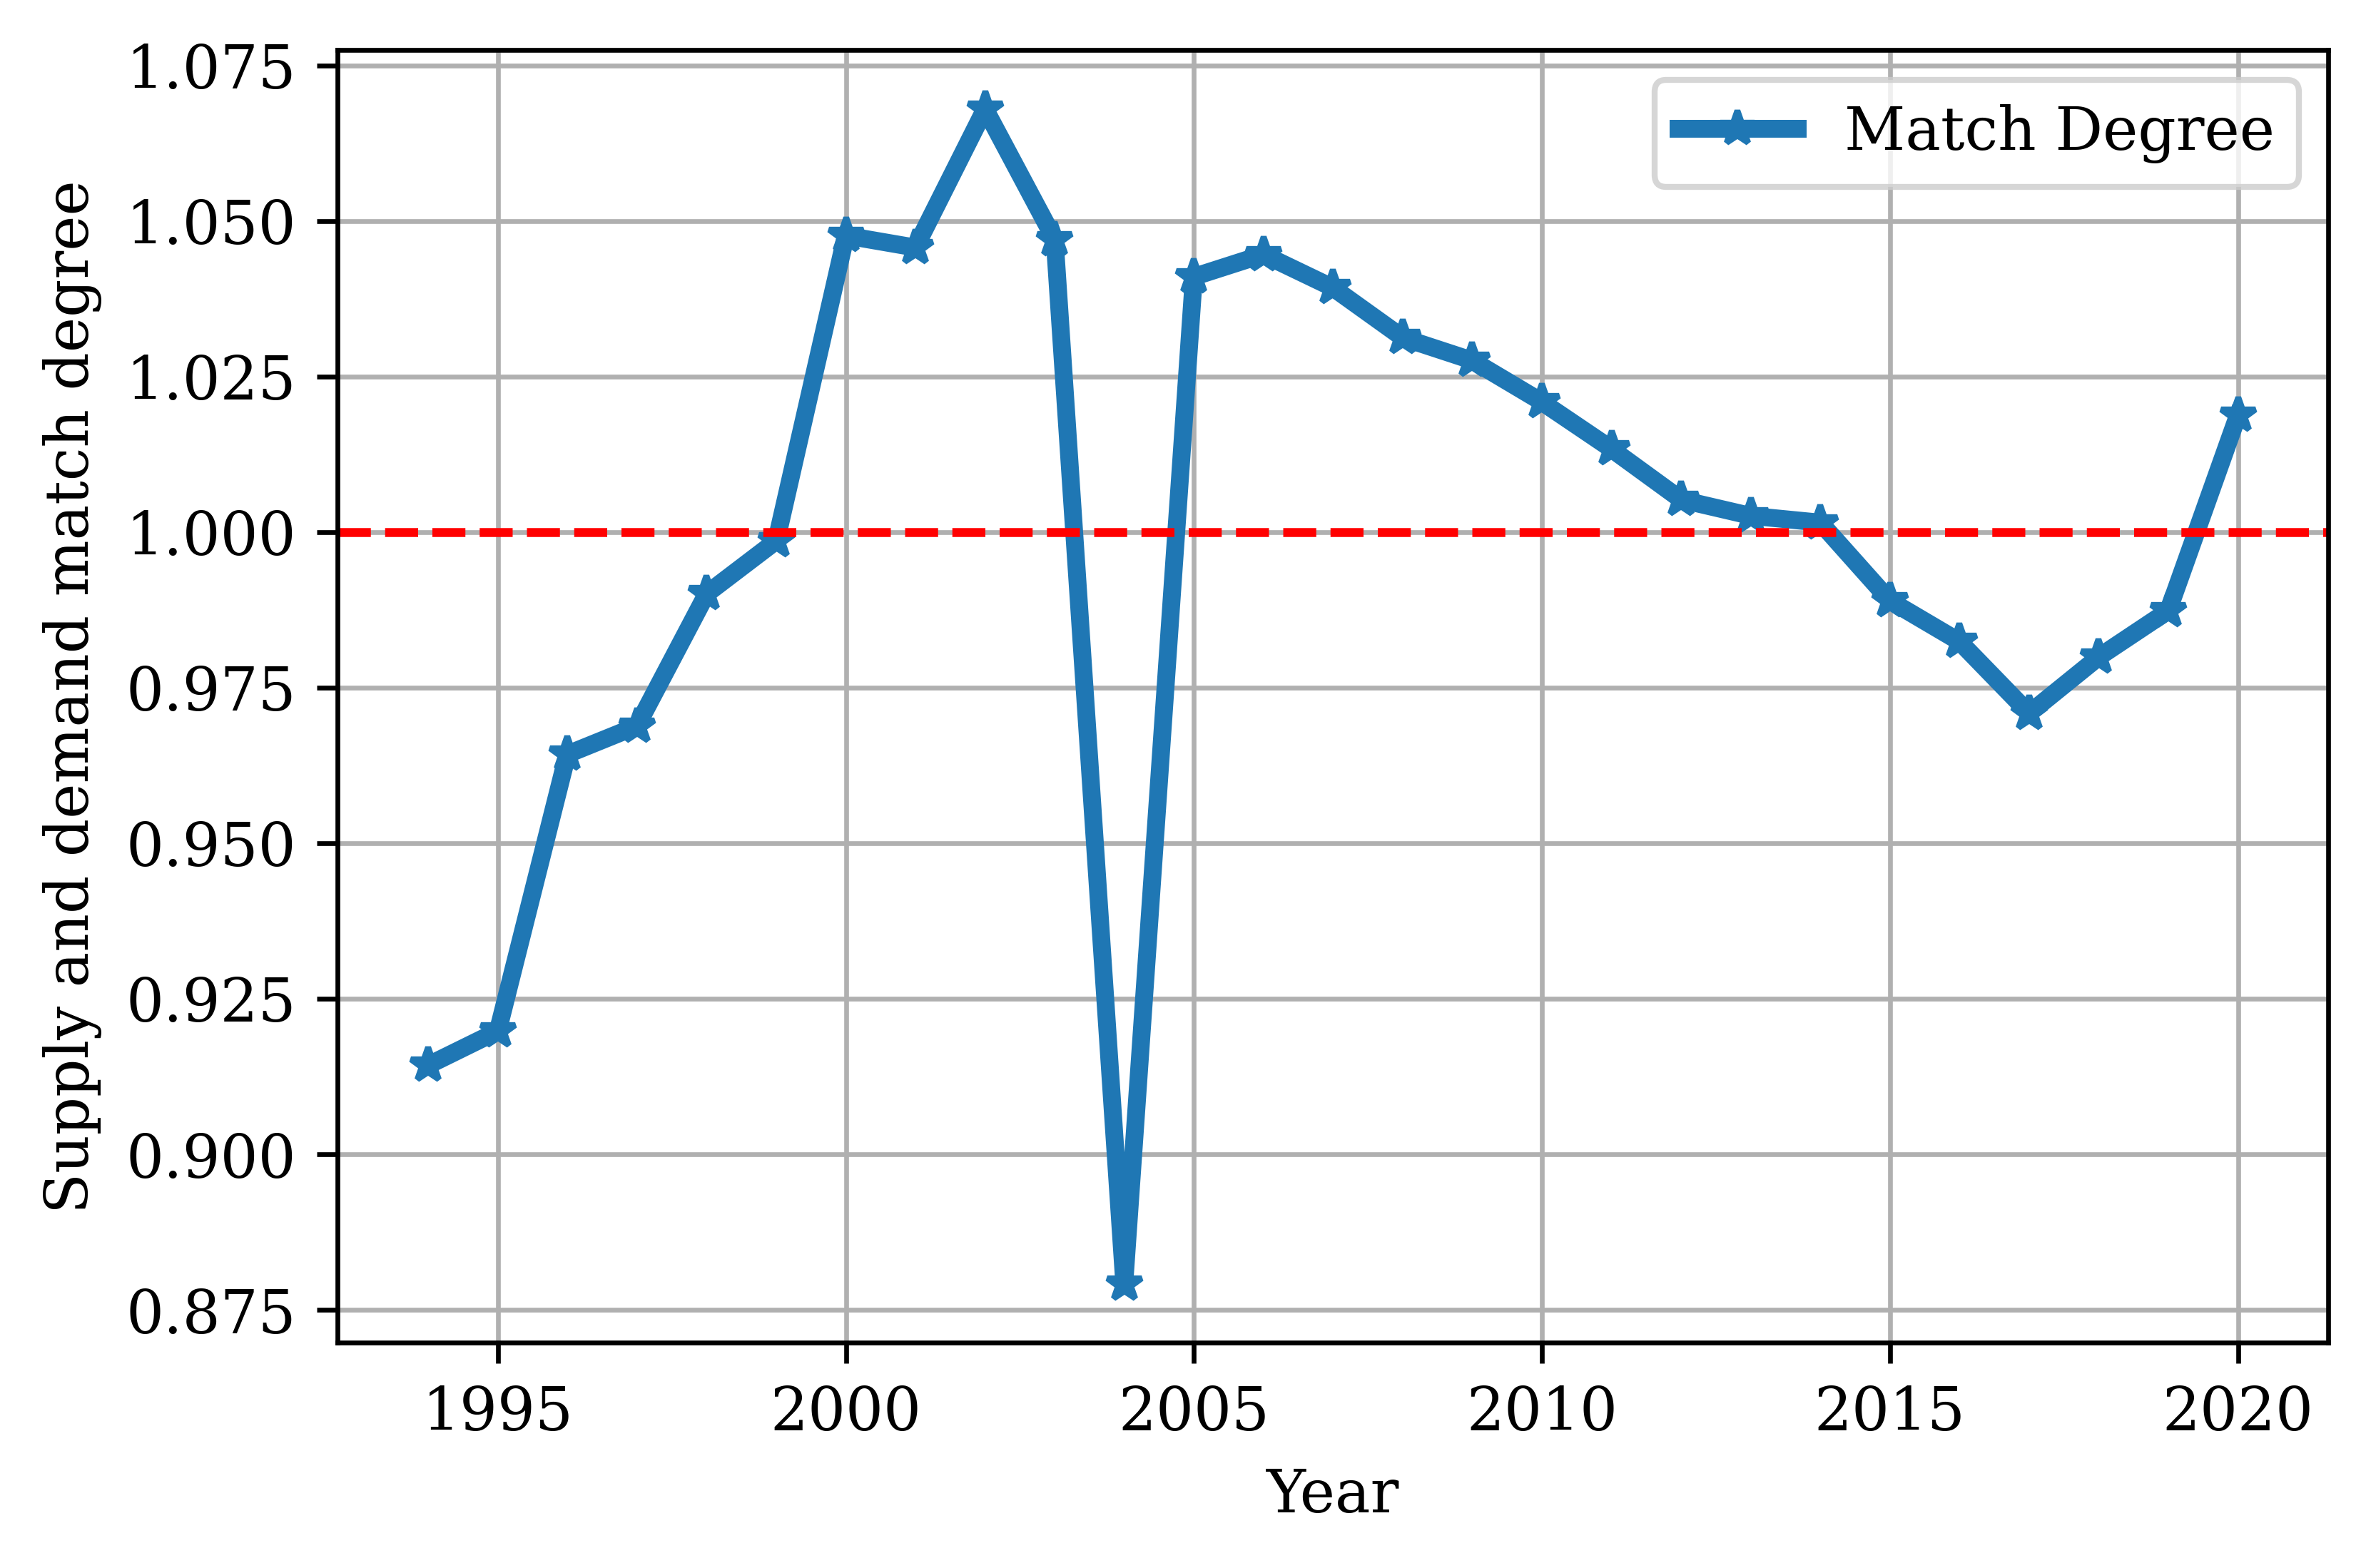

In [138]:
#beijing 1994-2020年出租匹配程度
list_degree=[df1['Taxi'].values[i]/predict_value[i] for i in range(len(df1))]
print(list_degree)
plt.figure(dpi=600)
plt.plot(df1['Time'],list_degree,lw=3,label='Match Degree',marker='*')
plt.axhline(y=1,ls='--',c='r')
plt.xlabel('Year')
plt.ylabel('Supply and demand match degree')
plt.grid()
plt.legend()
plt.savefig('供求匹配度.jpg')

In [139]:
'''
各种指标
'''
print(r2_score(df1['Taxi'],predict_value))
print(explained_variance_score(df1['Taxi'],predict_value))
print(np.sqrt(mean_squared_error(df1['Taxi'],predict_value)))
print(mean_absolute_error(df1['Taxi'],predict_value))
print(mean_squared_log_error(df1['Taxi'],predict_value))
print(np.mean(np.abs((predict_value - df1['Taxi'].values) / df1['Taxi'].values)) * 100)
print(f_test(df1['Taxi'],predict_value))

0.6276832423190564
0.6276832423190564
2757.1541446679785
2151.4417951351943
0.0020067810448229206
3.435068794438468
0.24167971551239242


In [140]:
#Lasso回归实现


# 构造不同的Lambda值
Lambdas = np.logspace(-5, 2, 200)
# 构造空列表，用于存储模型的偏回归系数
lasso_cofficients = []
for Lambda in Lambdas:
    lasso = Lasso(alpha=Lambda, normalize=True, max_iter=10000)
    lasso.fit(df2, df1['Taxi'])
    lasso_cofficients.append(lasso.coef_)

D:\Anacoda\anaconda\envs\BigData\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
D:\Anacoda\anaconda\envs\BigData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 

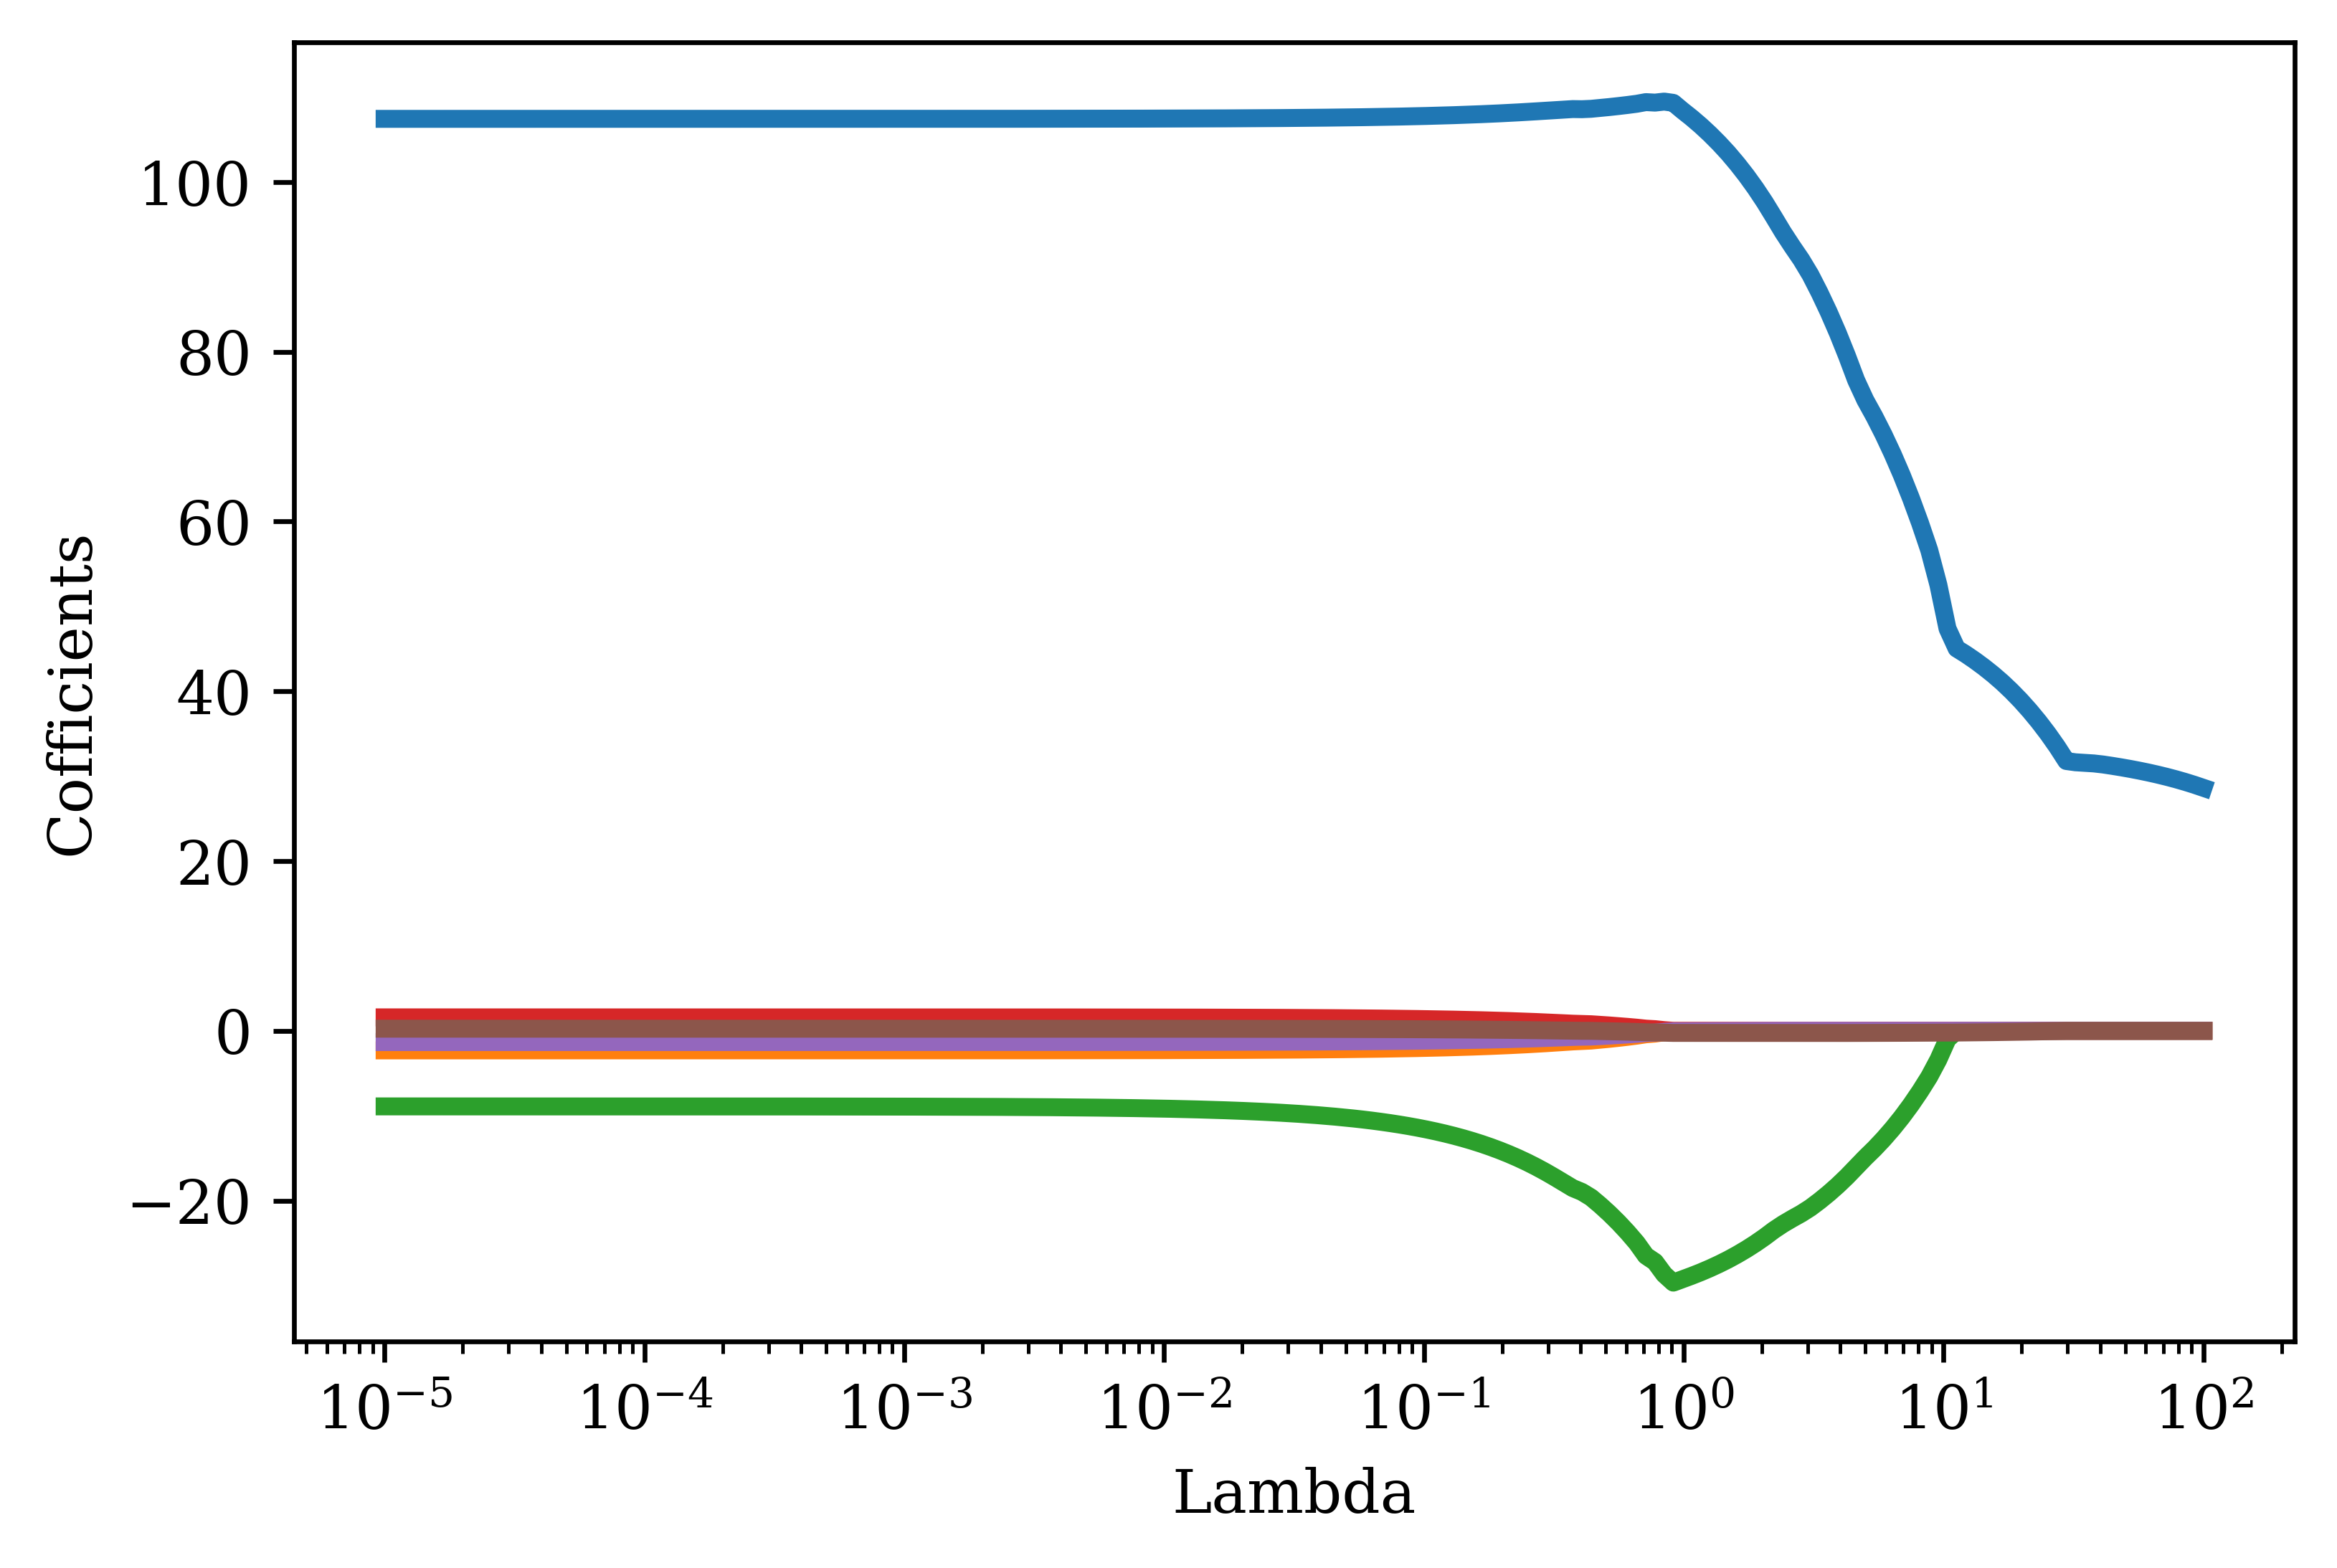

In [141]:
'''
可视化方法确定λ的值
'''
plt.figure(dpi=600)
# 绘制Lambda与回归线的折线图
plt.plot(Lambdas, lasso_cofficients,lw=3)
# 对x轴做对数变换
plt.xscale('log')
# 设置折线图x轴和y轴标签
plt.xlabel('Lambda')
plt.ylabel('Cofficients')
plt.savefig('Lasso_coef.jpg')
# 显示图形
plt.show()

In [142]:
# LASSO回归模型的交叉验证
lasso_cv = LassoCV(alphas=Lambdas, normalize=True, cv=10, max_iter=10000)
lasso_cv.fit(df2, df1['Taxi'])
# 输出最佳的lambda值
lasso_best_alpha = lasso_cv.alpha_  # 0.06294988990221888
print(lasso_best_alpha)

D:\Anacoda\anaconda\envs\BigData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74850.44000472873, tolerance: 45085.57953333333
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anacoda\anaconda\envs\BigData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86000.87785033882, tolerance: 45085.57953333333
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anacoda\anaconda\envs\BigData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88876.49896034598, tolerance: 45085.57953333333
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anacoda\anaconda\envs\BigData\lib\site-packages\sklearn\linear_mode

15.52225357427048


D:\Anacoda\anaconda\envs\BigData\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [144]:
# 基于最佳的lambda值建模
lasso = Lasso(alpha=lasso_best_alpha, normalize=True, max_iter=10000)
# 对"类"加以数据实体，执行回归系数的运算
lasso.fit(df2, df1['Taxi'])
# 模型预测
predict_value = lasso.predict(df2)
print(r2_score(df1['Taxi'],predict_value))
print(explained_variance_score(df1['Taxi'],predict_value))
print(np.sqrt(mean_squared_error(df1['Taxi'],predict_value)))
print(mean_absolute_error(df1['Taxi'],predict_value))
print(mean_squared_log_error(df1['Taxi'],predict_value))
print(np.mean(np.abs((predict_value - df1['Taxi'].values) / df1['Taxi'].values)) * 100)
print(f_test(df1['Taxi'],predict_value))

0.6992810987187779
0.6992810987187779
2477.9076586153587
1770.5575755256318
0.001629805814808499
2.830876845440298
0.2813613203976675


D:\Anacoda\anaconda\envs\BigData\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


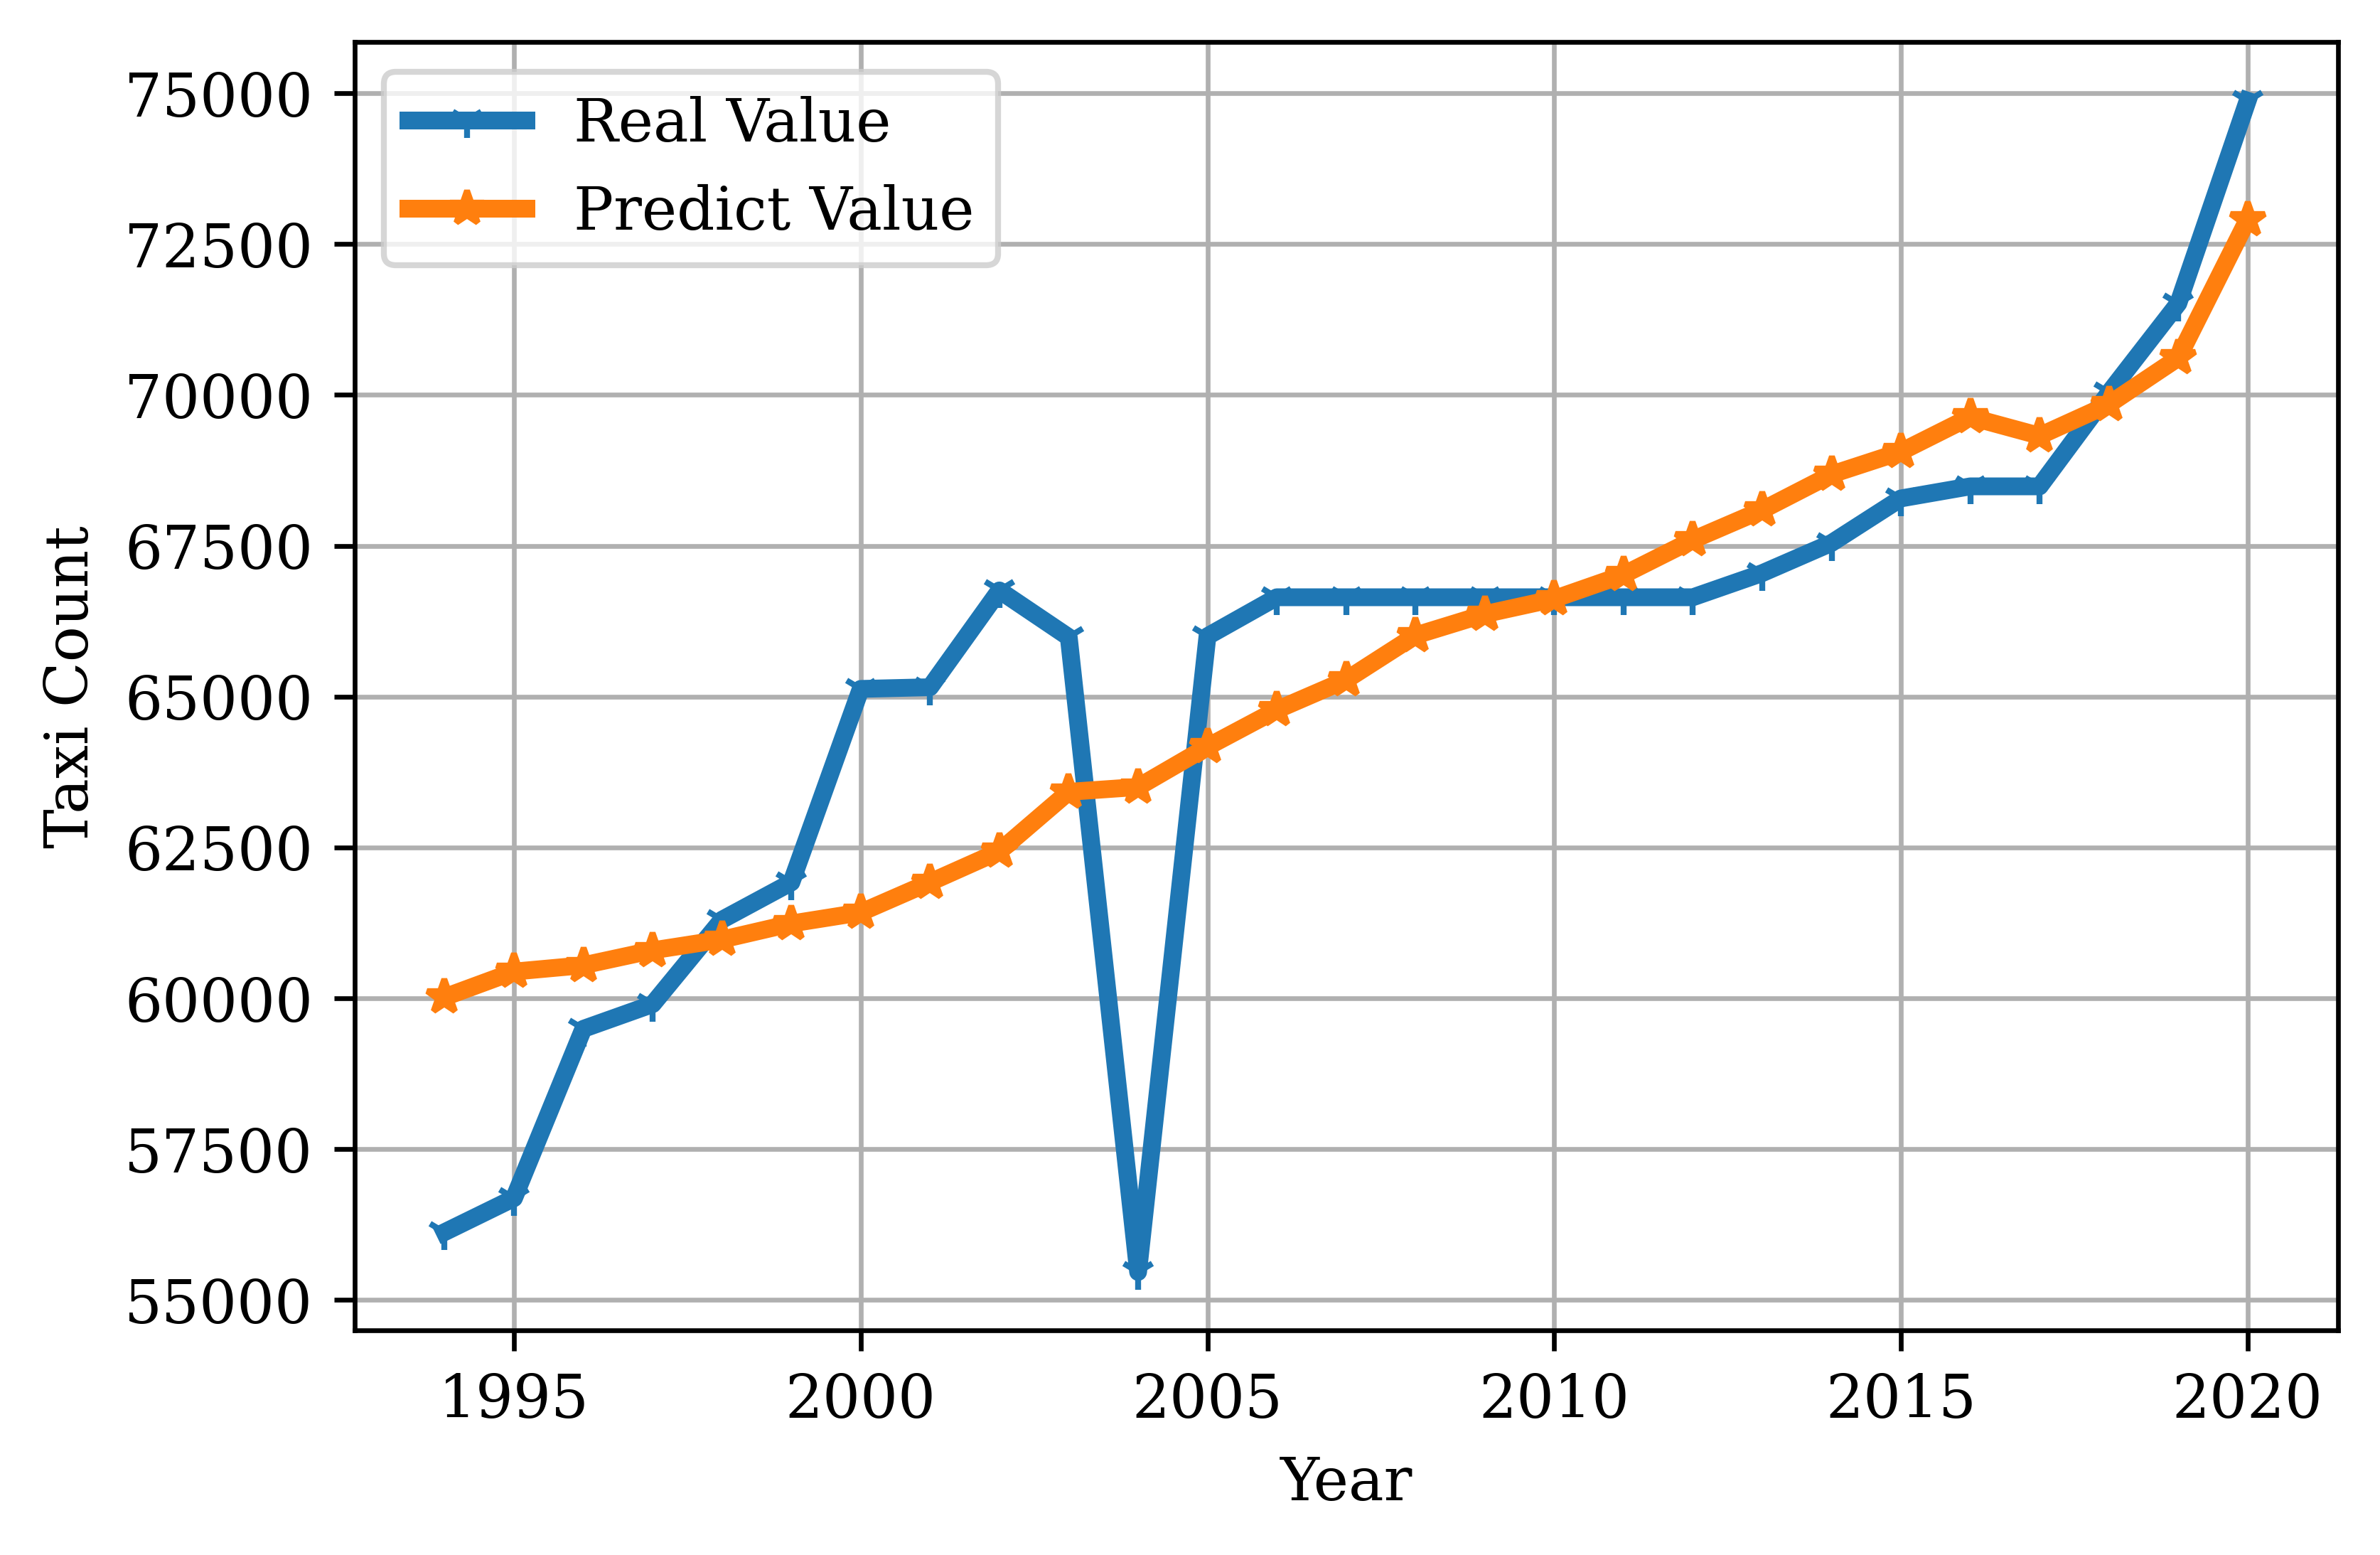

In [145]:
plt.figure(dpi=600)
plt.plot(df1['Time'],df1['Taxi'],lw=3,label='Real Value',marker='1',)
plt.plot(df1['Time'],predict_value,lw=3,label='Predict Value',marker='*')
plt.xlabel('Year')
plt.ylabel('Taxi Count')
plt.grid()
plt.legend()
plt.savefig('Lasso.jpg')

[0.9351071956851387, 0.9378542548127173, 0.9826024945697704, 0.985319296113807, 1.0053807783249098, 1.011122444959405, 1.0603314692317645, 1.0522024175244713, 1.069247960294616, 1.0404067625040199, 0.8734197818334939, 1.0285500925108613, 1.028820493620875, 1.0209839202743913, 1.0095769473808205, 1.0042017781072434, 1.0004064336217884, 0.9944240252120832, 0.9859382894363574, 0.9846474344369847, 0.9834538365539475, 0.9887960061669454, 0.9834866343419852, 0.9879108925286891, 1.0027275269910916, 1.0127842149824904, 1.0270056796456182]


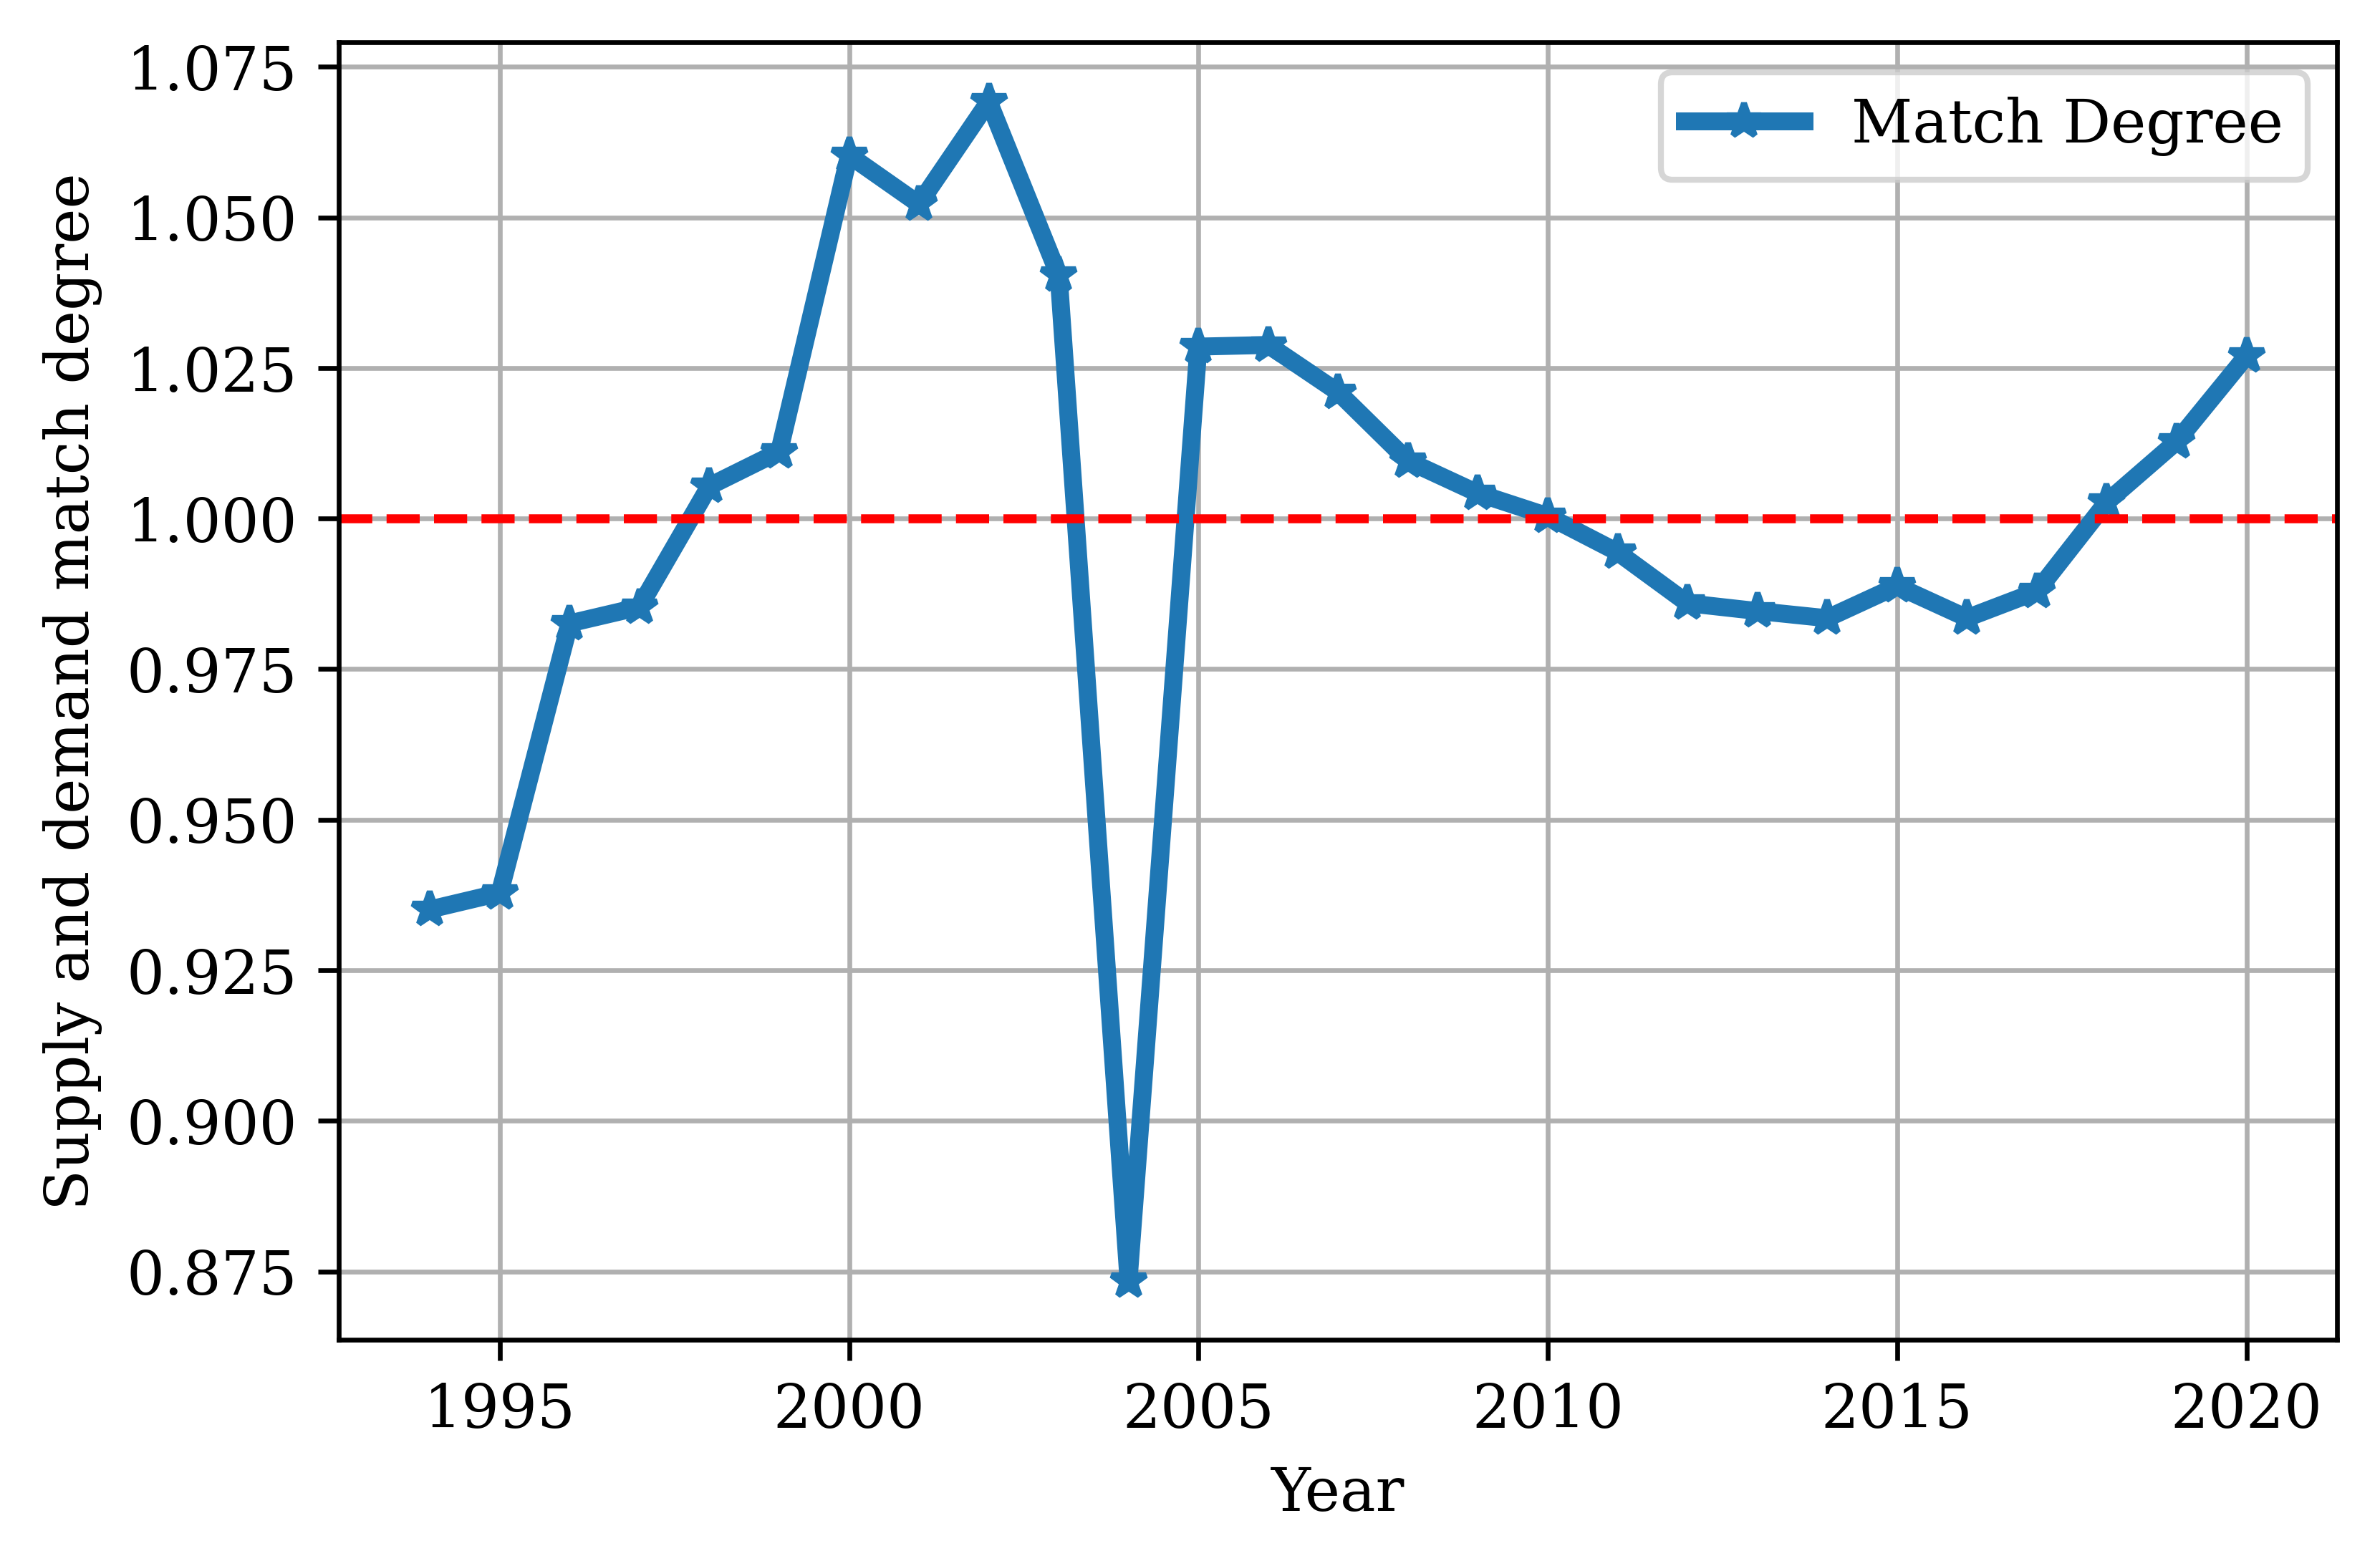

In [146]:
#beijing 1994-2020年出租匹配程度
list_degree=[df1['Taxi'].values[i]/predict_value[i] for i in range(len(df1))]
print(list_degree)
plt.figure(dpi=600)
plt.plot(df1['Time'],list_degree,lw=3,label='Match Degree',marker='*')
plt.axhline(y=1,ls='--',c='r')
plt.xlabel('Year')
plt.ylabel('Supply and demand match degree')
plt.grid()
plt.legend()
plt.savefig('供求匹配度(Lasso).jpg')